## Small  CNN VGG network with FASHION dataset
### Tested with internet photos

In [15]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # to disable GPU

from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from tensorflow.keras.optimizers import SGD
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

def Analyze_training(h):
# summarize history for accuracy
   plt.plot(h.history['accuracy'])
   plt.plot(h.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

Read Dataset (print 3 samples)

Train:  (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


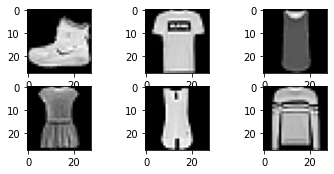

In [10]:
((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()
# Dataset Summary
print('Train: ', X_train.shape, y_train.shape)
print('Test: ',  X_test.shape, y_test.shape)
# plot first 6  images
for i in range(6):
   plt.subplot(330 + 1 + i)
   plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

Data preparation reshape single color scale and hot encode labels

In [11]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test  = X_test.reshape((X_test.shape[0], 28, 28, 1))
# one hot encode labels
print("before",y_test.shape)
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
# are numbers float? just make sure
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')
# normalize 
X_train = train_norm / 255.0
X_test = test_norm / 255.0
print(y_test.shape)

before (10000,)
(10000, 10)


CNN Network

In [12]:
def define_CNN():
   model = Sequential()
   model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
   model.add(MaxPooling2D((2, 2)))
   model.add(Flatten())
   model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
   model.add(Dense(10, activation='softmax'))

   opt = SGD(lr=0.01, momentum=0.9)
   model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
   model.summary()
   return model

In [13]:
model = define_CNN()
print("---",X_train.shape, y_train.shape)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test,y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
# append scores

2023-02-21 02:23:09.963966: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-21 02:23:09.964077: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: manero-ThinkPad-P52s
2023-02-21 02:23:09.964098: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: manero-ThinkPad-P52s
2023-02-21 02:23:09.964280: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.161.3
2023-02-21 02:23:09.964342: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.161.3
2023-02-21 02:23:09.964358: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.161.3
2023-02-21 02:23:09.965327: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the fol

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 100)               1254500   
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,256,150
Trainable params: 1,256,150
Non-trainable params: 0
______________________________________________

2023-02-21 02:24:03.953626: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 57s 30ms/step - loss: 0.4356 - accuracy: 0.8458 - val_loss: 0.3592 - val_accuracy: 0.8702
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2852 - accuracy: 0.8977 - val_loss: 0.3098 - val_accuracy: 0.8874
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2462 - accuracy: 0.9101 - val_loss: 0.2951 - val_accuracy: 0.8956
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2206 - accuracy: 0.9194 - val_loss: 0.2672 - val_accuracy: 0.9053
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1981 - accuracy: 0.9274 - val_loss: 0.2760 - val_accuracy: 0.9031
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1804 - accuracy: 0.9336 - val_loss: 0.2673 - val_accuracy: 0.9085
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1602 - accuracy: 0.9420 - val_loss: 0.2755 - val_accura

2023-02-21 02:32:02.540617: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


> 91.190


accuracy : 0.911899983882904


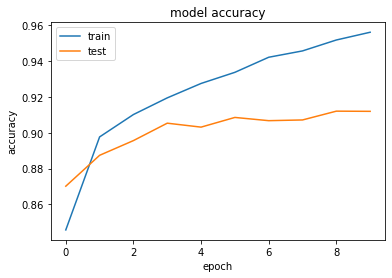

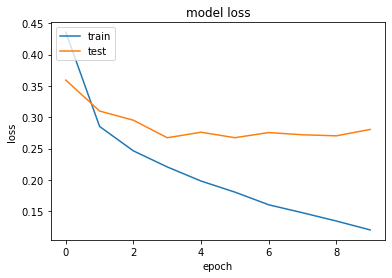

In [16]:
print("accuracy :", acc)
Analyze_training(history)

    Use classifier with an image

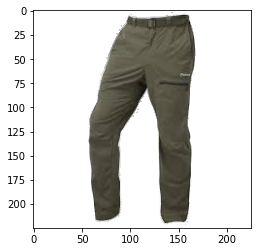

6


/home/manero/anaconda3/lib/python3.8/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


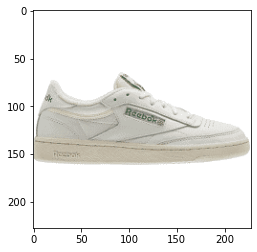

7


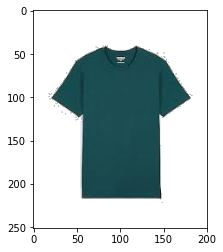

0


In [25]:
from keras.preprocessing.image import load_img,img_to_array
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

items = ['pants', 'sneaker', 'shirt']

for itm in items:

   filename = "./DAL_workshop_datasets/"+itm+".png"
   img = load_img(filename, grayscale=True, target_size=(28, 28))

   # convert to array
   img = img_to_array(img)
   # reshape into a single sample with 1 channel
   img = img.reshape(1, 28, 28, 1)
   # prepare pixel data
   img = img.astype('float32')
   img = img / 255.0
   photo =mpimg.imread(filename)
   imgplot = plt.imshow(photo)
   plt.show()
   # load an image and predict the class
   # load the image
   predict_x=model.predict(img) 
   result=np.argmax(predict_x,axis=1)

   print(result[0])

0 T-shirt/top
1 Trouser/pants
2 Pullover shirt
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


In [ ]:
#EOF